We study here the completeness of the dark matter halo population in the simulations. This is needed in order to compare with the observed luminosity function. 

# Initialize Modules and Paths

In [1]:
# load modules

import numpy as np
import os
import h5py
from astropy.cosmology import WMAP7 as cosmo
from hmf import MassFunction
from scipy.optimize import curve_fit

import read_in_halo_cat
import completeness

import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stixsans'
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.serif'] = 'STIXGeneral'



In [2]:
# define paths

path_main = os.environ['WDIR_halo_model']
path_figures = path_main + 'Figures/'
path_DM_cat = path_main + 'catalogs/DM/'



In [3]:
# define important parameters

volume_box = 100.0**3  # in Mpc^-3



# Compute Halo Mass Function Analytically

In [4]:
# construct analytical halo mass function
# 1 = Press-Schechter, 2 = Jenkins, 3 = Sheth-Tormen, 4 = Warren, 5 = Tinker
# output:
# masses_analytic: Masses used for the generation of the analytic mass function. Units: M_solar
# n_cumulative_analytic: Number density of halos with mass greater then the corresponding mass in masses_analytic. Units: comoving Mpc^-3
# dndM_dM_analytic: Differential number density of halos, (dn/dM)*dM.

# define function for construction of halo mass function

def compute_HMF_analytically(redshift, cumulative=False):
    '''
    PS, Jenkins, SMT, Warren, Tinker08 
    '''
    HMF = MassFunction(cosmo_model=cosmo, z=redshift, Mmin=8, Mmax=15, hmf_model='SMT')
    #hmf.update(hmf_model='Sheth-Tormen') #update baryon density and redshift
    masses = HMF.m/cosmo.h
    if cumulative:
        MF = HMF.ngtm*cosmo.h**3
    else:
        MF = HMF.dndlog10m*cosmo.h**3    
    return(masses, MF)


HMF_analytic_z4 = compute_HMF_analytically(4.0)
HMF_analytic_z6 = compute_HMF_analytically(6.0)
HMF_analytic_z8 = compute_HMF_analytically(8.0)
HMF_analytic_z10 = compute_HMF_analytically(10.0)

HMFcum_analytic_z4 = compute_HMF_analytically(4.0, cumulative=True)
HMFcum_analytic_z6 = compute_HMF_analytically(6.0, cumulative=True)
HMFcum_analytic_z8 = compute_HMF_analytically(8.0, cumulative=True)
HMFcum_analytic_z10 = compute_HMF_analytically(10.0, cumulative=True)


# Compute Halo Mass Function from Simulations

In [5]:
# define function for computing halo mass function


def compute_HMF_simulations(DM_cat_name, volume_box, redshift, cumulative=False, completeness_correction=False):
    '''
    Compute halo mass function from halo catalog.
    '''
    z_table_in, M_table_in, Mt_table_in = read_in_halo_cat.read_in_halo_cat(path_DM_cat + DM_cat_name, cosmo)
    idx_good = np.isfinite(np.log10(M_table_in))
    mass_bins = np.linspace(9.0, 13.5, num=91)
    mass_bins_center = mass_bins[:-1] + 0.5*np.diff(mass_bins)
    mass_bins_left = mass_bins[:-1]
    if completeness_correction:
        weights = 10**completeness.get_completeness_correction(np.log10(M_table_in), redshift)
    else:
        weights = None
    hist, bin_edges = np.histogram(np.log10(M_table_in[idx_good]), bins=mass_bins, weights=weights)
    if cumulative:
        HMFcum = np.cumsum(hist[::-1])[::-1]/volume_box
        return(mass_bins_left, HMFcum)
    else:
        HMF = hist/(np.diff(mass_bins)*volume_box)
        return(mass_bins_center, HMF)
    


In [6]:
# define names of catalog files

DM_cat_name_list = ['MergerHistory_COLOR_CDM_z3.96.hdf5', 'MergerHistory_COLOR_CDM_z5.98.hdf5', 'MergerHistory_COLOR_CDM_z8.10.hdf5', 'MergerHistory_COLOR_CDM_z10.00.hdf5']





In [7]:
# compute halo mass function from simulations
HMF_z4 = compute_HMF_simulations(DM_cat_name_list[0], volume_box, 4.0, cumulative=False)
HMF_z6 = compute_HMF_simulations(DM_cat_name_list[1], volume_box, 6.0, cumulative=False)
HMF_z8 = compute_HMF_simulations(DM_cat_name_list[2], volume_box, 8.0, cumulative=False)
HMF_z10 = compute_HMF_simulations(DM_cat_name_list[3], volume_box, 10.0, cumulative=False)

# cumulative version
HMFcum_z4 = compute_HMF_simulations(DM_cat_name_list[0], volume_box, 4.0, cumulative=True)
HMFcum_z6 = compute_HMF_simulations(DM_cat_name_list[1], volume_box, 6.0, cumulative=True)
HMFcum_z8 = compute_HMF_simulations(DM_cat_name_list[2], volume_box, 8.0, cumulative=True)
HMFcum_z10 = compute_HMF_simulations(DM_cat_name_list[3], volume_box, 10.0, cumulative=True)


# Compute Completeness

## Cumulative

/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


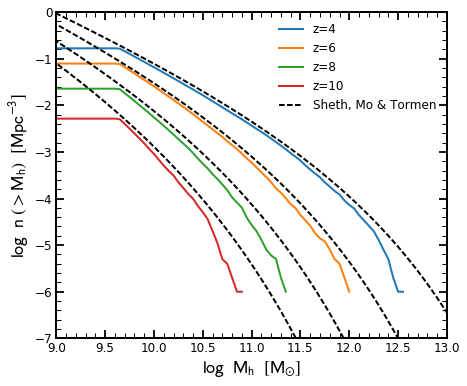

In [8]:

# make figure: plot halo mass function

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))

ax.plot(HMFcum_z4[0], np.log10(HMFcum_z4[1]), '-', lw=2, label='z=4')
ax.plot(np.log10(HMFcum_analytic_z4[0]), np.log10(HMFcum_analytic_z4[1]), '--', color='black', lw=2) 

ax.plot(HMFcum_z6[0], np.log10(HMFcum_z6[1]), '-', lw=2, label='z=6')
ax.plot(np.log10(HMFcum_analytic_z6[0]), np.log10(HMFcum_analytic_z6[1]), '--', color='black', lw=2) 

ax.plot(HMFcum_z8[0], np.log10(HMFcum_z8[1]), '-', lw=2, label='z=8')
ax.plot(np.log10(HMFcum_analytic_z8[0]), np.log10(HMFcum_analytic_z8[1]), '--', color='black', lw=2) 

ax.plot(HMFcum_z10[0], np.log10(HMFcum_z10[1]), '-', lw=2, label='z=10')
ax.plot(np.log10(HMFcum_analytic_z10[0]), np.log10(HMFcum_analytic_z10[1]), '--', color='black', lw=2, label='Sheth, Mo & Tormen') 

ax.set_xlabel(r'$\log\/\/\/\/\mathrm{M}_{\rm h}\/\/\/\/[\mathrm{M}_{\odot}]$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/\/\mathrm{n}\/\/(>\mathrm{M}_{\rm h})\/\/\/\/[\mathrm{Mpc}^{-3}]$', fontsize=18)

ax.set_xlim([9, 13])
ax.set_ylim([-7.0, 0.0])

plt.legend(frameon=False, fontsize=12)
#plt.savefig(path_figures + 'Ha_Conversion.pdf', bbox_inches='tight')
plt.show()



## Non-cumulative 

/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


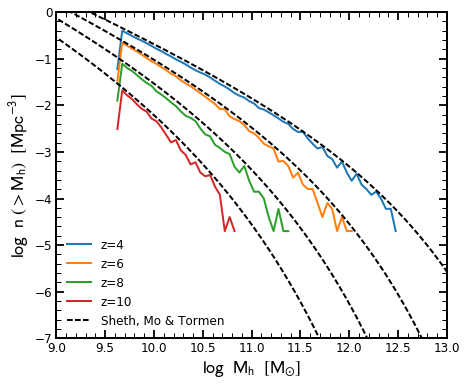

In [9]:
# make figure: plot halo mass function

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))

ax.plot(HMF_z4[0], np.log10(HMF_z4[1]), '-', lw=2, label='z=4')
ax.plot(np.log10(HMF_analytic_z4[0]), np.log10(HMF_analytic_z4[1]), '--', color='black', lw=2) 

ax.plot(HMF_z6[0], np.log10(HMF_z6[1]), '-', lw=2, label='z=6')
ax.plot(np.log10(HMF_analytic_z6[0]), np.log10(HMF_analytic_z6[1]), '--', color='black', lw=2) 

ax.plot(HMF_z8[0], np.log10(HMF_z8[1]), '-', lw=2, label='z=8')
ax.plot(np.log10(HMF_analytic_z8[0]), np.log10(HMF_analytic_z8[1]), '--', color='black', lw=2) 

ax.plot(HMF_z10[0], np.log10(HMF_z10[1]), '-', lw=2, label='z=10')
ax.plot(np.log10(HMF_analytic_z10[0]), np.log10(HMF_analytic_z10[1]), '--', color='black', lw=2, label='Sheth, Mo & Tormen') 

ax.set_xlabel(r'$\log\/\/\/\/\mathrm{M}_{\rm h}\/\/\/\/[\mathrm{M}_{\odot}]$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/\/\mathrm{n}\/\/(>\mathrm{M}_{\rm h})\/\/\/\/[\mathrm{Mpc}^{-3}]$', fontsize=18)

ax.set_xlim([9, 13])
ax.set_ylim([-7.0, 0.0])

plt.legend(frameon=False, fontsize=12)
#plt.savefig(path_figures + 'Ha_Conversion.pdf', bbox_inches='tight')
plt.show()



In [10]:
# define function for estimating difference

def estimate_difference(mass_list, HMF_s, HMF_a):
    HMF_sim = np.interp(mass_list, HMF_s[0], np.log10(HMF_s[1]), left=np.nan, right=np.nan)
    HMF_ana = np.interp(mass_list, np.log10(HMF_a[0]), np.log10(HMF_a[1]), left=np.nan, right=np.nan)
    difference = HMF_ana-HMF_sim
    difference[~np.isfinite(difference)] = np.nan
    return(difference)


In [11]:
mass_list = np.linspace(9.5, 13.0, num=71)

diff_z4 = estimate_difference(mass_list, HMF_z4, HMF_analytic_z4)
diff_z6 = estimate_difference(mass_list, HMF_z6, HMF_analytic_z6)
diff_z8 = estimate_difference(mass_list, HMF_z8, HMF_analytic_z8)
diff_z10 = estimate_difference(mass_list, HMF_z10, HMF_analytic_z10)


/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


In [12]:
diff_z4[mass_list<9.8] = np.nan
diff_z6[mass_list<9.8] = np.nan
diff_z8[mass_list<9.8] = np.nan
diff_z10[mass_list<9.8] = np.nan

In [13]:

def func_comp(x, a, b, c):
    x_new = 10**x/c
    return(np.log10(a*x_new**b*np.exp(x_new)))


def get_completeness_correction(log_Mh, redshift_in):
    '''
    This function returns the completeness correction for
    a given halo mass (all in log units).
    '''
    diff_limit = 0.06
    redshift_list = np.array([4.0, 6.0, 8.0, 10.0])
    ii_redshift = np.abs(redshift_list-redshift_in).argmin()
    if (redshift_list[ii_redshift] == 4.0):
        popt = [1.20813739e+00, 3.04174445e-03, 1.00000000e+13]
    elif (redshift_list[ii_redshift] == 6.0):
        popt = [1.95393928e+00, 8.28309118e-02, 9.99999987e+12]
    elif (redshift_list[ii_redshift] == 8.0):
        popt = [1.47856861e+00, 6.14304840e-02, 2.54652583e+11]
    elif (redshift_list[ii_redshift] == 10.0):
        popt = [1.03167560e+00, 8.87468518e-30, 5.42649366e+10]
    diff = func_comp(log_Mh, popt[0], popt[1], popt[2])
    diff[diff<diff_limit] = diff_limit
    return(diff)




In [14]:
popt_z4, pcov_z4 = curve_fit(func_comp, mass_list[~np.isnan(diff_z4)], diff_z4[~np.isnan(diff_z4)], p0=[1.0, 0.0, 10**12.0], bounds=([0.0, 0.0, 10**9], [3.0, 1.0, 10**13]))
popt_z6, pcov_z6 = curve_fit(func_comp, mass_list[~np.isnan(diff_z6)], diff_z6[~np.isnan(diff_z6)], p0=[1.0, 0.0, 10**11.5], bounds=([0.0, 0.0, 10**9], [3.0, 1.0, 10**13]))
popt_z8, pcov_z8 = curve_fit(func_comp, mass_list[~np.isnan(diff_z8)], diff_z8[~np.isnan(diff_z8)], p0=[1.0, 0.0, 10**10.5], bounds=([0.0, 0.0, 10**9], [3.0, 1.0, 10**13]))
popt_z10, pcov_z10 = curve_fit(func_comp, mass_list[~np.isnan(diff_z10)], diff_z10[~np.isnan(diff_z10)], p0=[1.0, .0, 10**10.0], bounds=([0.0, 0.0, 10**9], [3.0, 1.0, 10**13]))



In [15]:
print popt_z4
print popt_z6
print popt_z8
print popt_z10

[  1.20813739e+00   3.04174445e-03   1.00000000e+13]
[  1.95393928e+00   8.28309118e-02   9.99999987e+12]
[  1.47856861e+00   6.14304840e-02   2.54652583e+11]
[  1.03167560e+00   8.87468518e-30   5.42649366e+10]


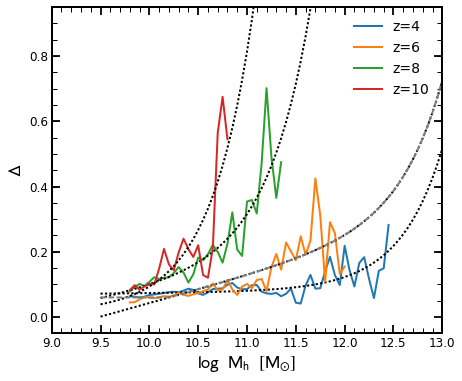

In [16]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))

ax.plot(mass_list, diff_z4, '-', lw=2, label='z=4')
ax.plot(mass_list, func_comp(mass_list, popt_z4[0], popt_z4[1], popt_z4[2]), ':', lw=2, color='black')
ax.plot(mass_list, diff_z6, '-', lw=2, label='z=6')
ax.plot(mass_list, func_comp(mass_list, popt_z6[0], popt_z6[1], popt_z6[2]), ':', lw=2, color='black')
ax.plot(mass_list, diff_z8, '-', lw=2, label='z=8')
ax.plot(mass_list, func_comp(mass_list, popt_z8[0], popt_z8[1], popt_z8[2]), ':', lw=2, color='black')
ax.plot(mass_list, diff_z10, '-', lw=2, label='z=10')
ax.plot(mass_list, func_comp(mass_list, popt_z10[0], popt_z10[1], popt_z10[2]), ':', lw=2, color='black')

ax.plot(mass_list, get_completeness_correction(mass_list, 6.0), '--', lw=2, color='gray')


ax.set_xlabel(r'$\log\/\/\/\/\mathrm{M}_{\rm h}\/\/\/\/[\mathrm{M}_{\odot}]$', fontsize=18)
ax.set_ylabel(r'$\Delta$', fontsize=18)

ax.set_xlim([9, 13])
ax.set_ylim([-0.05, 0.95])

plt.legend(frameon=False, fontsize=14)
#plt.savefig(path_figures + 'Ha_Conversion.pdf', bbox_inches='tight')
plt.show()


# Test Completeness Correction for HMF

In [17]:
# compute halo mass function from simulations with weights for completeness correction

HMF_z4_corr = compute_HMF_simulations(DM_cat_name_list[0], volume_box, 4.0, cumulative=False, completeness_correction=True)
HMF_z6_corr = compute_HMF_simulations(DM_cat_name_list[1], volume_box, 6.0, cumulative=False, completeness_correction=True)
HMF_z8_corr = compute_HMF_simulations(DM_cat_name_list[2], volume_box, 8.0, cumulative=False, completeness_correction=True)
HMF_z10_corr = compute_HMF_simulations(DM_cat_name_list[3], volume_box, 10.0, cumulative=False, completeness_correction=True)


/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/sandrotacchella/anacond

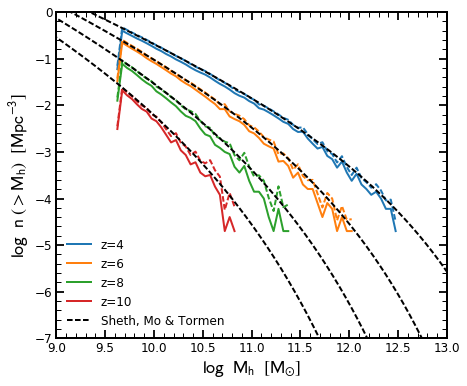

In [20]:
# make figure: plot halo mass function

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))

ax.plot(HMF_z4[0], np.log10(HMF_z4[1]), '-', lw=2, color='C0', label='z=4')
ax.plot(HMF_z4_corr[0], np.log10(HMF_z4_corr[1]), '--', lw=2, color='C0')
ax.plot(np.log10(HMF_analytic_z4[0]), np.log10(HMF_analytic_z4[1]), '--', color='black', lw=2) 

ax.plot(HMF_z6[0], np.log10(HMF_z6[1]), '-', lw=2, color='C1', label='z=6')
ax.plot(HMF_z6_corr[0], np.log10(HMF_z6_corr[1]), '--', lw=2, color='C1')
ax.plot(np.log10(HMF_analytic_z6[0]), np.log10(HMF_analytic_z6[1]), '--', color='black', lw=2) 

ax.plot(HMF_z8[0], np.log10(HMF_z8[1]), '-', lw=2, color='C2', label='z=8')
ax.plot(HMF_z8_corr[0], np.log10(HMF_z8_corr[1]), '--', lw=2, color='C2')
ax.plot(np.log10(HMF_analytic_z8[0]), np.log10(HMF_analytic_z8[1]), '--', color='black', lw=2) 

ax.plot(HMF_z10[0], np.log10(HMF_z10[1]), '-', lw=2, color='C3', label='z=10')
ax.plot(HMF_z10_corr[0], np.log10(HMF_z10_corr[1]), '--', lw=2, color='C3')
ax.plot(np.log10(HMF_analytic_z10[0]), np.log10(HMF_analytic_z10[1]), '--', color='black', lw=2, label='Sheth, Mo & Tormen') 

ax.set_xlabel(r'$\log\/\/\/\/\mathrm{M}_{\rm h}\/\/\/\/[\mathrm{M}_{\odot}]$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/\/\mathrm{n}\/\/(>\mathrm{M}_{\rm h})\/\/\/\/[\mathrm{Mpc}^{-3}]$', fontsize=18)

ax.set_xlim([9, 13])
ax.set_ylim([-7.0, 0.0])

plt.legend(frameon=False, fontsize=12)
#plt.savefig(path_figures + 'Ha_Conversion.pdf', bbox_inches='tight')
plt.show()

